In [18]:
import btrack
from btrack.utils import import_HDF, import_JSON

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import pandas as pd

from btrack.dataio import import_all_tracks_JSON 
from btrack.constants import Fates
import os

# import from JSON

In [21]:
path = '/home/nathan/data/fucci/tracks/tracks_cellpose'

tracks = import_all_tracks_JSON(path, cell_type = 'None')

In [22]:
print(tracks[0].fate)
#print(tracks[0].x)
filter_tracks = [track for track in tracks if track.fate != Fates.TERMINATE_BORDER]
track_lengths = [len(track) for track in filter_tracks] 
print(track_lengths)


Fates.UNDEFINED
[39, 6, 82, 190, 2, 6, 75, 5, 7, 57, 22, 16, 7, 22, 17, 94, 119, 301, 60, 110, 197, 58, 166, 389, 1, 296, 2, 71, 89, 18, 116, 20, 102, 67, 173, 110, 33, 98, 205, 27, 300, 52, 32, 27, 103, 56, 124, 1, 28, 19, 55, 50, 93, 426, 69, 114, 164, 262, 27, 120, 59, 5, 28, 18, 70, 433, 13, 36, 243, 20, 85, 12, 16, 29, 117, 10, 1, 35, 26, 64, 184, 54, 92, 10, 34, 36, 353, 15, 12, 42, 428, 14, 142, 399, 73, 43, 118, 92, 24, 4, 6, 33, 6, 3, 85, 66, 58, 27, 18, 34, 120, 22, 13, 377, 69, 288, 67, 134, 314, 301, 75, 43, 19, 16, 17, 5, 47, 120, 74, 373, 1, 59, 81, 138, 19, 6, 87, 95, 24, 57, 24, 1014, 13, 118, 15, 15, 3, 35, 108, 54, 118, 5, 1, 2, 6, 20, 1, 10, 100, 1, 9, 13, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 250, 1, 158, 1, 1, 125, 263, 1, 1, 1, 38, 1, 1, 1, 1, 1, 1, 1, 1, 3, 132, 1, 57, 6, 2, 1, 1, 7, 281, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 82, 1, 161, 3, 2, 3, 2, 250, 1, 1, 1, 2, 1, 21, 1, 1, 1, 1, 1, 1, 1, 19, 1, 4, 1, 8, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 111, 1, 8, 36, 55, 16, 1, 1

### histogram of track lengths

1014


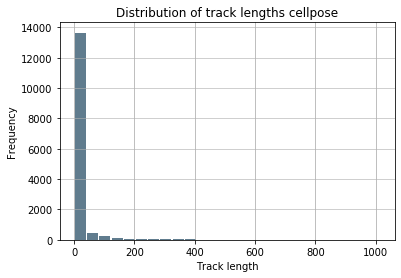

In [23]:
#size, scale = 1000, 10
tracks_df = pd.Series(track_lengths)
print(max(tracks_df))

tracks_df.plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='#607c8e')
title = 'Distribution of track lengths cellpose'
plt.title(title)
plt.xlabel('Track length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
fn = os.path.join(path, title)
plt.savefig(fn)

# import from HDF5

In [ ]:
objects = import_HDF('/home/nathan/data/fucci/HDF/tracks_v5.h5', filter_using=None)
# needs more attn

In [ ]:
print(objects[0])

## get segmentation from corrupted h5 file

In [1]:
from skimage import io 
from arboretum.io import ArboretumHDFHandler
with ArboretumHDFHandler('/home/nathan/data/fucci/HDF/tracks_v5_state_labels.1.h5') as h:
    segmentation = h.segmentation
io.imsave('seg.tif', segmentation)

[INFO][2020/06/09 05:05:58 PM] Opening HDF file: /home/nathan/data/fucci/HDF/tracks_v5_state_labels.1.h5
[INFO][2020/06/09 05:06:00 PM] Closing HDF file: /home/nathan/data/fucci/HDF/tracks_v5_state_labels.1.h5
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: seg.tif is a low contrast image
  """


## Get the tracks

In [ ]:
# NOTE(arl):  This should be from your image segmentation code
objects = import_HDF('/home/nathan/data/fucci/HDF/segmented.hdf5', filter_using=None)


print(objects)
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

  # configure the tracker using a config file
  tracker.configure_from_file('/home/nathan/analysis/BayesianTracker/models/cell_config_1.json')

  # append the objects to be tracked
  tracker.append(objects)

  # set the volume (Z axis volume is set very large for 2D data)
  tracker.volume=((0,1024),(0,1024),(-1e5,1e5))

  # track them (in interactive mode)
  tracker.track_interactive(step_size=100)

  # generate hypotheses and run the global optimiser
  tracker.optimize()

  # get the tracks as a python list
  tracks = tracker.tracks

In [ ]:
# get the first track
track_zero = tracks[0]

# print the length of the track
print(len(track_zero))

# print all of the xyzt positions in the track
print(track_zero.x)
print(track_zero.y)
print(track_zero.z)
print(track_zero.t)

# print the fate of the track
print(track_zero.fate)

# print the track ID, root node, parent node and children
print(track_zero.ID)
print(track_zero.root)
print(track_zero.parent)
print(track_zero.children)

### visualize the tracks

In [ ]:
### length of tracks 
for i in range(len(tracks)):
    print("track no.",i,"length=", len(tracks[i]))
    

In [ ]:
mpl.rcParams['legend.fontsize'] = 10


fig = plt.figure()
ax = fig.gca(projection='3d')

track_34 = tracks[51]
z = list(range(len(track_34)))

x = track_34.x
y = track_34.y
ax.plot(x, y, z, label='track_34')
ax.legend()

plt.show()

# output .hdf5

In [ ]:
fn = '/home/nathan/analysis/BayesianTracker/examples/segmented_v5.hdf5'
tracker.export(fn,obj_type='obj_type_1')

# do all of the above

In [ ]:
import btrack
from btrack.utils import import_HDF
from btrack.utils import import_JSON

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# NOTE(arl):  This should be from your image segmentation code
objects = import_HDF('/home/nathan/data/fucci/HDF/segmented.hdf5')

print(objects)
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

    # configure the tracker using a config file
    tracker.configure_from_file('/home/nathan/analysis/BayesianTracker/models/cell_config_1.json')

    # append the objects to be tracked
    tracker.append(objects)

    # set the volume (Z axis volume is set very large for 2D data)
    tracker.volume=((0,1024),(0,1024),(-1e5,1e5))

    # track them (in interactive mode)
    tracker.track_interactive(step_size=100)

    # generate hypotheses and run the global optimiser
    tracker.optimize()

    # get the tracks as a python list
    tracks = tracker.tracks

    fn = '/home/nathan/data/fucci/HDF/segmented.hdf5'
    tracker.export(fn,obj_type='obj_type_1')
    
    print("tick")


In [ ]:
import arboretum

from skimage import io
#seg = io.imread('/home/nathan/data/fucci/other_mask_data/segmented_v5.tif')
arboretum.run()

# export to xml 

In [ ]:
def export_to_FIJI(filename, tracks, trees=[]):
    import json
    import xml.etree.cElementTree as ET
    root = ET.Element("data", name=filename)
    for trk in tracks:
        trajectory = ET.SubElement(root, "trajectory", id=str(int(trk.ID)))
        ET.SubElement(trajectory, "root").text = str(trk.root)
        ET.SubElement(trajectory, "length").text = str(len(trk))
        ET.SubElement(trajectory, "fate").text = str(trk.fate.value)
        ET.SubElement(trajectory, "x").text = str([float("{0:2.1f}".format(x)) for x in trk.x])
        ET.SubElement(trajectory, "y").text = str([float("{0:2.1f}".format(y)) for y in trk.y])
        ET.SubElement(trajectory, "n").text = str([int(t) for t in trk.t])
        ET.SubElement(trajectory, "class").text = str([l.lower() for l in trk.label])
        if trk.parent != 0:
            # ET.SubElement(trajectory, "parent").text = str(trk.parent-1)
            # NOTE(arl): need to check whether this -1 on the index is required
            ET.SubElement(trajectory, "parent").text = str(trk.parent)
        else:
            ET.SubElement(trajectory, "parent").text = str(None)
        if trk.children:
            ET.SubElement(trajectory, "children").text = str(trk.children)
    for tree in trees:
        lin_tree = lineage.linearise_tree(tree)
        if len(lin_tree) > 1:
            root_node = lin_tree.pop(0)
            this_tree = ET.SubElement(root, "tree", root_id=str(root_node.ID))
            for child in lin_tree:
                ET.SubElement(this_tree, "child").text = str(child.ID)
    XMLtree = ET.ElementTree(root)
    XMLtree.write(filename)

In [ ]:
export_to_FIJI('/home/nathan/analysis/segmented.xml', tracks)